In [ ]:
import numpy as np
import tensorflow as tf
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
from keras.preprocessing import image
import os
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib # Import the pathlib module

data_dir_train = pathlib.Path("/content/drive/MyDrive/melanoma_cancer_dataset/train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/melanoma_cancer_dataset/test")

image generator using ImageDataGenerator()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/main project/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/main project/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 700 images belonging to 2 classes.
Found 700 images belonging to 2 classes.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/main project/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/main project/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 700 images belonging to 2 classes.
Found 700 images belonging to 2 classes.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/main project/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/main project/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 700 images belonging to 2 classes.
Found 700 images belonging to 2 classes.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/main project/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/main project/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 700 images belonging to 2 classes.
Found 700 images belonging to 2 classes.


model creation

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

train the model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[]  # Remove early stopping callback
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 703s 31s/step - accuracy: 0.5285 - loss: 0.8669 - val_accuracy: 0.6726 - val_loss: 0.6247
Epoch 2/20
 1/21 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.6169

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7500 - loss: 0.6169 - val_accuracy: 0.7500 - val_loss: 0.6103
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 293ms/step - accuracy: 0.6821 - loss: 0.5873 - val_accuracy: 0.6786 - val_loss: 0.5820
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.7188 - loss: 0.5950 - val_accuracy: 0.8214 - val_loss: 0.3430
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.7693 - loss: 0.4773 - val_accuracy: 0.8616 - val_loss: 0.3425
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.3852 - val_accuracy: 0.8929 - val_loss: 0.3321
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 274ms/step - accuracy: 0.8074 - loss: 0.4205 - val_accuracy: 0.8259 - val_loss: 0.3829
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8438 - loss: 0.4216 - val_accuracy: 0.7500 - val_loss: 0.4409
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 319ms/step - accuracy: 0.8298 - loss: 0.3824 - val_accuracy: 0.8676 - val_los

evaluate the model

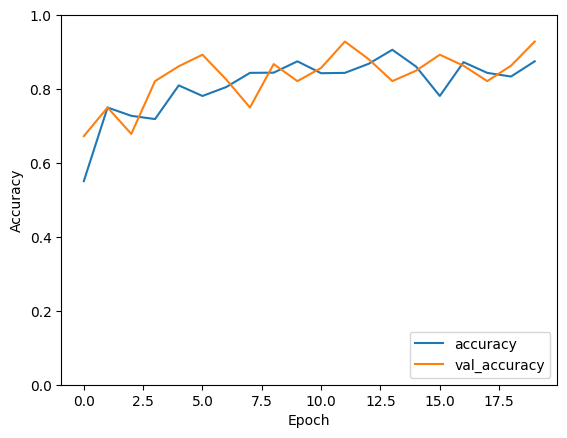

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()




In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction: [[0.48445335]]
it is Non-melanoma


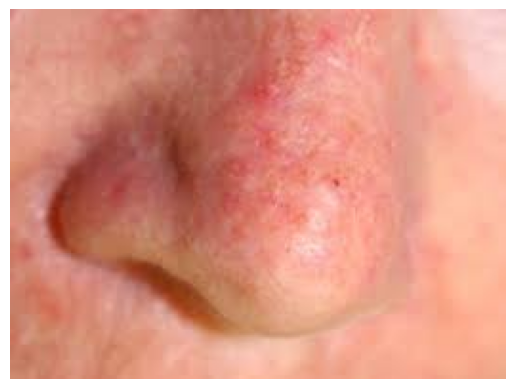

In [ ]:
filepath='/content/imagesnon melo'
# Evaluate on a new image
def predict_image(filepath):
    img = image.load_img(filepath, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255

    prediction = model.predict(img_array)
    print('Prediction:', prediction)
    if prediction < 0.5:
        print('it is Non-melanoma')
    else:
        print('Yes it is Melanoma')

# Example usage:
predict_image('/content/imagesnon melo')


ImagePath=r"/content/imagesnon melo"

# Load the image using image.load_img
img = image.load_img(ImagePath)

# Display the image
plt.imshow(img) # Pass the image data, not the file path.
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
model.save('agh_model.keras')